In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
# Определяем столбцы, которые нам нужны
columns_to_load = [
    "Местное время в Перми", "T", "Po", "U", "Ff", "N", "H", "VV"
]
# Переименуем их для удобства
new_column_names = {
    "Местное время в Перми": "time",
    "T": "temperature",
    "Po": "pressure",
    "U": "humidity",
    "Ff": "wind_speed",
    "N": "cloudiness",
    "H": "cloud_height",
    "VV": "visibility"
}

try:
    # Загружаем данные, используя точку с запятой как разделитель
    df_weather = pd.read_csv('data/weather1.csv', sep=';', usecols=columns_to_load)
    df_weather.rename(columns=new_column_names, inplace=True)
    print("Данные успешно загружены.")

    # --- Предобработка данных ---
    # Преобразуем время в datetime
    df_weather['time'] = pd.to_datetime(df_weather['time'])
    
    # Очистим столбец облачности от '%' и преобразуем в число
    # errors='coerce' заменит значения вроде 'менее 10%' на NaN
    df_weather['cloudiness'] = df_weather['cloudiness'].str.replace('%.', '', regex=False)
    df_weather['cloudiness'] = pd.to_numeric(df_weather['cloudiness'], errors='coerce')

    # Преобразуем остальные столбцы в числовой формат, заменяя ошибки на NaN
    for col in ['temperature', 'pressure', 'humidity', 'wind_speed', 'visibility']:
        df_weather[col] = pd.to_numeric(df_weather[col], errors='coerce')
    
    print("\nТипы данных после обработки:")
    df_weather.info()
    
    print("\nПервые 5 строк датафрейма:")
    display(df_weather.head())

except FileNotFoundError:
    print("Ошибка: файл 'data/weather1.csv' не найден.")
    df_weather = pd.DataFrame() # Создаем пустой DF для избежания ошибок

Данные успешно загружены.

Типы данных после обработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          2919 non-null   datetime64[ns]
 1   temperature   2919 non-null   float64       
 2   pressure      2917 non-null   float64       
 3   humidity      2919 non-null   int64         
 4   wind_speed    2919 non-null   int64         
 5   cloudiness    1727 non-null   float64       
 6   cloud_height  2551 non-null   object        
 7   visibility    2917 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 182.6+ KB

Первые 5 строк датафрейма:


C:\Users\Thero\AppData\Local\Temp\ipykernel_24636\3221498490.py:25: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_weather['time'] = pd.to_datetime(df_weather['time'])


,time,temperature,pressure,humidity,wind_speed,cloudiness,cloud_height,visibility
0,2021-12-31 23:00:00,-9.8,745.8,83,3,100.0,600-1000,4.0
1,2021-12-31 20:00:00,-10.6,747.4,81,3,100.0,1000-1500,4.0
2,2021-12-31 17:00:00,-11.6,748.6,79,2,NaN,1000-1500,10.0
3,2021-12-31 14:00:00,-11.9,749.8,77,1,100.0,1000-1500,20.0
4,2021-12-31 11:00:00,-13.6,750.4,79,1,100.0,1000-1500,10.0


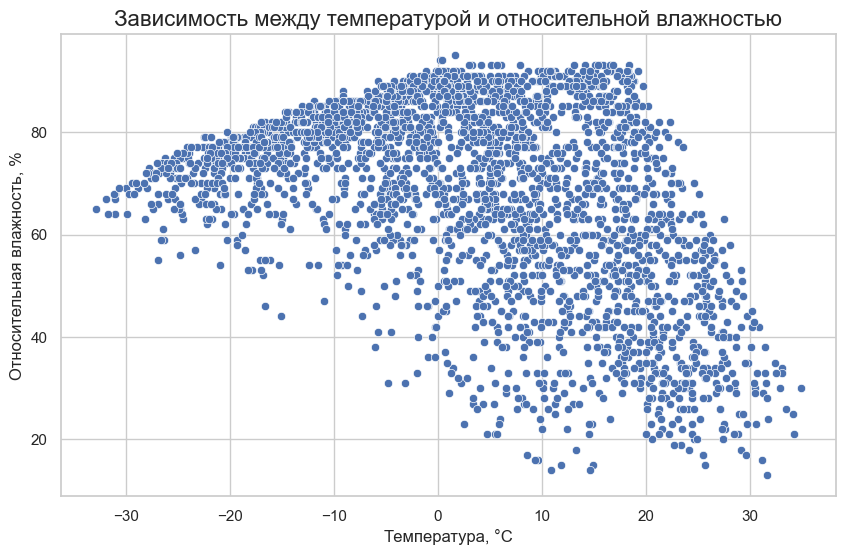

In [6]:
sns.scatterplot(data=df_weather, x='temperature', y='humidity')
plt.title('Зависимость между температурой и относительной влажностью', fontsize=16)
plt.xlabel('Температура, °C', fontsize=12)
plt.ylabel('Относительная влажность, %', fontsize=12)
plt.show()

In [8]:
# Создаем новый столбец для цвета
df_weather['cloudiness_category'] = np.where(df_weather['cloudiness'] == 100, 'Облачность 100%', 'Другое')

sns.scatterplot(data=df_weather, x='temperature', y='humidity', hue='cloudiness_category', palette={'Облачность 100%': 'blue', 'Другое': 'red'})
plt.title('Зависимость температуры и влажности с учетом облачности', fontsize=16)
plt.xlabel('Температура, °C', fontsize=12)
plt.ylabel('Относительная влажность, %', fontsize=12)
plt.legend(title='Облачность')
plt.show()

NameError: name 'np' is not defined